# Ball and Stick model
Based on https://neuron.yale.edu/neuron/docs/ball-and-stick-model-part-1

In [8]:
from neuron import h
from neuron.units import ms, mV

In [9]:
class BallAndStick:
    def __init__(self, global_id):
        self._gid = global_id
        self._setup_morphology()
        self._setup_biophysics()

    def _setup_morphology(self):
        # Create Sections:
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.sections = [self.soma, self.dend]

        # Connect Sections:
        self.dend.connect(self.soma)

        # Cell dimensions:
        self.soma.L = self.soma.diam = 12.6157
        self.dend.L = 200
        self.dend.diam = 1

    def _setup_biophysics(self):
        # Configure electrical mechanics:
        for section in self.sections:
            section.Ra = 100    # Axial resistance in Ohm * cm
            section.cm = 1      # Membrane capacitance in micro Farads / cm^2

        # Configure Hodgkin-Huxley kinetics:
        self.soma.insert('hh')
        for seg in self.soma:
            seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
            seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
            seg.hh.gl = 0.0003    # Leak conductance in S/cm2
            seg.hh.el = -54.3     # Reversal potential in mV

        # Insert passive current in the dendrite:
        self.dend.insert('pas')
        for seg in self.dend:
            seg.pas.g = 0.001  # Passive conductance in S/cm2
            seg.pas.e = -65    # Leak reversal potential mV 

    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [10]:
h.load_file('stdrun.hoc')

test_cell = BallAndStick(0)

stim = h.IClamp(test_cell.dend(1))
stim.delay = 5
stim.dur = 1
stim.amp = 0.1

v = h.Vector().record(test_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-65 * mV)
h.continuerun(25 * ms)

0.0

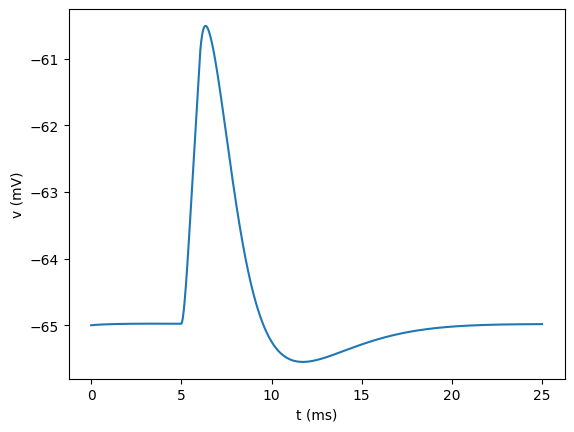

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(t, v)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.show()